# Ph.D Spring 2018 Problem 1

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.xsection('default', 1e10, 50000)
xt = mdl.xsection('truss', 50e3, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  6.0, 8.0)
mdl.node('3', 12.0, 8.0)
mdl.node('4', 12.0, 0.0)

mdl.beam('a', n['2'], n['3'])
mdl.beam('b', n['3'], n['4'])
mdl.truss('c', n['1'], n['2'], xsec=xt)

# mdl.hinge(e['a'], n['2'])

mdl.fix(n['1'], ['x','y', 'rz'])
# mdl.fix(n['2'], ['rz'])
mdl.fix(n['4'], ['x','y', 'rz'])

mdl.numDOF()

[[7, 8, 9], [1, 2, 3], [4, 5, 6], [10, 11, 12]]

The loading is next defined, as follows:

In [3]:
# Define loading
n['2'].p['x']  = -50
e['c'].q0['1'] =  50.183
# em.utilities.export.FEDEAS(mdl)

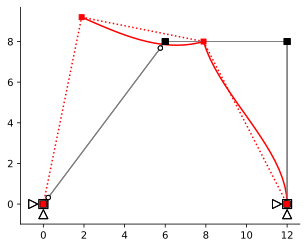

In [4]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)
U_disp = em.analysis.SolveDispl(mdl) 
em.plot_U(mdl, U_disp, ax, scale=100)

In [5]:
mdl.redundant(e['c'], '1')
B = em.B_matrix(mdl)
B.barx

,$c_1$
$a_1$,0.6
$a_2$,0.0
$a_3$,-4.8
$b_1$,-0.8
$b_2$,4.8
$b_3$,-9.6
$c_1$,1.0


## Part 3: Find member forces

In [6]:
B = em.B_matrix(mdl)
A = em.A_matrix(mdl)
V = A.f@U_disp
V

,$V_{{fffff}}$
$a_1$,2.089324e-08
$a_2$,-2.428469e-03
$a_3$,4.856937e-03
$b_1$,1.618979e-08
$b_2$,-2.285166e-03
$b_3$,-5.143542e-03
$c_1$,-1.509591e-02


In [7]:
Ks = em.K_matrix(mdl).s
Q0 = em.Q_vector(B).o
Q = Ks@V + Q0
Q

,$Vector_{{fffff}}$
$a_{1}$,34.822071
$a_{2}$,0.000000
$a_{3}$,121.423432
$b_{1}$,20.237239
$b_{2}$,-121.423432
$b_{3}$,-157.153135
$c_{1}$,-25.296548
